In [1]:
%matplotlib inline

# import statements
import numpy as np
import matplotlib.pyplot as plt #for figures
from mpl_toolkits.basemap import Basemap #to render maps
import math
import json #to write dict with parameters

import GrowYourIC
from GrowYourIC import positions, geodyn, geodyn_trg, geodyn_static, plot_data, data

plt.rcParams['figure.figsize'] = (8.0, 3.0) #size of figures
cm = plt.cm.get_cmap('viridis')
cm2 = plt.cm.get_cmap('winter')

In [6]:
print("==== Models ====")

age_ic_dim = 1e9 #in years
rICB_dim = 1221. #in km

velocity_center = [0., 100.]#center of the eastern hemisphere
center = [0,-80] #center of the western hemisphere

units = None #we give them already dimensionless parameters. 
rICB = 1.
age_ic = 1.


#Slow translation 
v_slow = 0.8
omega_slow = 1.57
exponent_slow = 1.
velocity_slow = geodyn_trg.translation_velocity(velocity_center, v_slow)


proxy_type = "growth rate"#"growth rate"
proxy_name = "growth rate (km/Myears)" #growth rate (km/Myears)"
proxy_lim = None

print("=== Model 1 : slow translation, no rotation ===")
SlowTranslation = geodyn_trg.TranslationGrowthRotation() #can do all the models presented in the paper
parameters = dict({'units': units,
              'rICB': rICB, 
              'tau_ic':age_ic,
              'vt': velocity_slow,
              'exponent_growth': exponent_slow,
              'omega': 0.,
              'proxy_type': proxy_type, 
              'proxy_name': proxy_name,
              'proxy_lim': proxy_lim})
SlowTranslation.set_parameters(parameters)
SlowTranslation.name = "Slow translation"
SlowTranslation.define_units()

print("=== Model 2 : slow translation, rotation ===")
SlowTranslation2 = geodyn_trg.TranslationGrowthRotation() #can do all the models presented in the paper
parameters = dict({'units': units,
              'rICB': rICB, 
              'tau_ic':age_ic,
              'vt': velocity_slow,
              'exponent_growth': exponent_slow,
              'omega': omega_slow,
              'proxy_type': proxy_type, 
              'proxy_name': proxy_name,
              'proxy_lim': proxy_lim})
SlowTranslation2.set_parameters(parameters)
SlowTranslation2.name = "Slow translation + rotation"
SlowTranslation2.define_units()

#Fast translation
v_fast = 10.3
omega_fast = 7.85
time_translation = rICB_dim*1e3/4e-10/(np.pi*1e7)
maxAge = 2.*time_translation/1e6
velocity_fast = geodyn_trg.translation_velocity(velocity_center, v_fast)
exponent_fast = 0.1


proxy_type = "age"
proxy_name = "age (Myears)" #growth rate (km/Myears)"
proxy_lim = [0, maxAge]


print("=== Model 3 : fast translation, no rotation ===")
FastTranslation = geodyn_trg.TranslationGrowthRotation() #can do all the models presented in the paper
parameters = dict({'units': units,
              'rICB': rICB, 
              'tau_ic':age_ic,
              'vt': velocity_fast,
              'exponent_growth': exponent_fast,
              'omega': 0.,
              'proxy_type': proxy_type, 
              'proxy_name': proxy_name,
              'proxy_lim': proxy_lim})
FastTranslation.set_parameters(parameters)
FastTranslation.name = "Fast translation"
FastTranslation.define_units()

print("=== Model 4 : fast translation, rotation ===")
FastTranslation2 = geodyn_trg.TranslationGrowthRotation() #can do all the models presented in the paper
parameters = dict({'units': units,
              'rICB': rICB, 
              'tau_ic':age_ic,
              'vt': velocity_fast,
              'exponent_growth': exponent_fast,
              'omega': omega_fast,
              'proxy_type': proxy_type, 
              'proxy_name': proxy_name,
              'proxy_lim': proxy_lim})
FastTranslation2.set_parameters(parameters)
FastTranslation2.name = "Fast translation + rotation"
FastTranslation2.define_units()

==== Models ====
=== Model 1 : slow translation, no rotation ===
=== Model 2 : slow translation, rotation ===
=== Model 3 : fast translation, no rotation ===
=== Model 4 : fast translation, rotation ===


===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Fast translation
= Proxy is age
= Data set is Perfect sampling in the equatorial plane
= Proxy is evaluated for bt_point
= Number of points to examine: 60
===


/usr/local/lib/python3.5/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Fast translation + rotation
= Proxy is age
= Data set is Perfect sampling in the equatorial plane
= Proxy is evaluated for bt_point
= Number of points to examine: 60
===
===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Slow translation
= Proxy is age
= Data set is Perfect sampling in the equatorial plane
= Proxy is evaluated for bt_point
= Number of points to examine: 60
===
===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Slow translation + rotation
= Proxy is age
= Data set is Perfect sampling in the equatorial plane
= Proxy is evaluated for bt_point
= Number of points to examine: 60
===


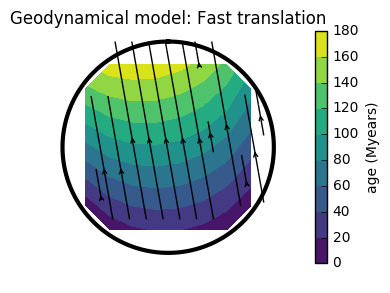

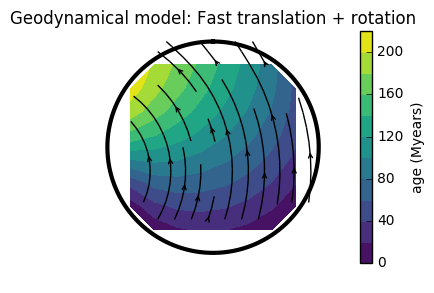

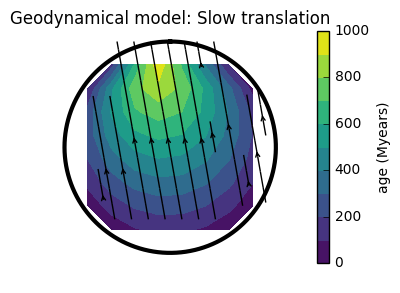

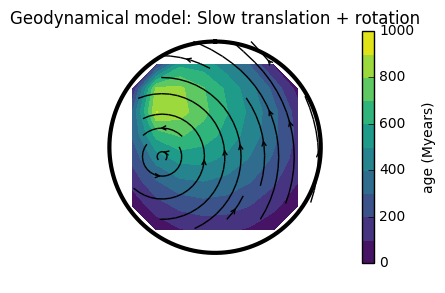

In [9]:
npoints = 10 #number of points in the x direction for the data set. 
data_set = data.PerfectSamplingEquator(npoints, rICB = 1.)
data_set.method = "bt_point"

proxy = geodyn.evaluate_proxy(data_set, FastTranslation, proxy_type="age", verbose = False)
data_set.plot_c_vec(FastTranslation, proxy=proxy, cm=cm, nameproxy="age (Myears)")
proxy = geodyn.evaluate_proxy(data_set, FastTranslation2, proxy_type="age", verbose = False)
data_set.plot_c_vec(FastTranslation2, proxy=proxy, cm=cm, nameproxy="age (Myears)")
proxy = geodyn.evaluate_proxy(data_set, SlowTranslation, proxy_type="age", verbose = False)
data_set.plot_c_vec(SlowTranslation, proxy=proxy, cm=cm, nameproxy="age (Myears)")
proxy = geodyn.evaluate_proxy(data_set, SlowTranslation2, proxy_type="age", verbose = False)
data_set.plot_c_vec(SlowTranslation2, proxy=proxy, cm=cm, nameproxy="age (Myears)")